In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class LogisticRegression:
    def __init__(self,LearningRate=0.001, Iterations=10000 ):
        self.LearningRate = LearningRate
        self.Iterations = Iterations
        self.weights = None
        self.bias = None

    def SigmoidFxn(self, z):
        return 1 / (1 + np.exp(-z))

    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.Iterations):
            Linear_Model = np.dot(X, self.weights) + self.bias
            y_predicted = self.SigmoidFxn(Linear_Model)

            dw = (1/ n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/ n_samples) * np.sum(y_predicted - y)

            self.weights -= self.LearningRate * dw
            self.bias -= self.LearningRate * db

    def predict(self, X):
        Linear_Model = np.dot(X, self.weights) + self.bias
        y_predicted = self.SigmoidFxn(Linear_Model)
        return [1 if i>0.5 else 0 for i in y_predicted]


In [8]:
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification

    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    y = y.astype(float)  # Ensure labels are float
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(LearningRate=0.001, Iterations=10000)  # Adjusted hyperparameters
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = np.mean(predictions == y_test)
    print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.8250


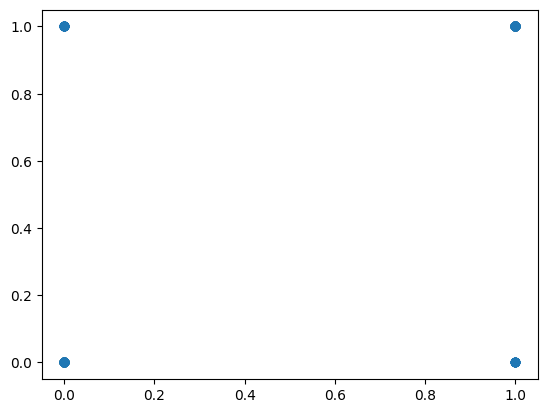

In [9]:
plt.scatter(predictions, y_test)